Indonesia Bagian Data:
1. Amjad Adhie
2. Iskandar Muda
3. Raka Admiharfan Fatihah

Import Library

In [50]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import tensorflow as tf


Dataset

In [51]:
train = pd.read_csv('dataset/train_features.csv')
train.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN


In [52]:
test = pd.read_csv('dataset/test_features.csv')
test.head()

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


In [53]:
label = pd.read_csv('dataset/train_labels.csv')
label.head()

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4


In [54]:
# memeriksa setiap kolom dari data train yang kosong
train.isnull().sum()

tahun_kelahiran               0
pendidikan                  189
status_pernikahan           212
pendapatan                  190
jumlah_anak_balita          190
jumlah_anak_remaja          204
terakhir_belanja            172
belanja_buah                181
belanja_daging              178
belanja_ikan                193
belanja_kue                 214
pembelian_diskon            178
pembelian_web               165
pembelian_toko              169
keluhan                     196
tanggal_menjadi_anggota    2752
dtype: int64

In [55]:
# memeriksa setiap kolom dari data test yang kosong 
test.isnull().sum()

ID                            0
tahun_kelahiran               0
pendidikan                  204
status_pernikahan           182
pendapatan                  203
jumlah_anak_balita          209
jumlah_anak_remaja          210
terakhir_belanja            201
belanja_buah                186
belanja_daging              195
belanja_ikan                196
belanja_kue                 187
pembelian_diskon            179
pembelian_web               180
pembelian_toko              186
keluhan                     193
tanggal_menjadi_anggota    2759
dtype: int64

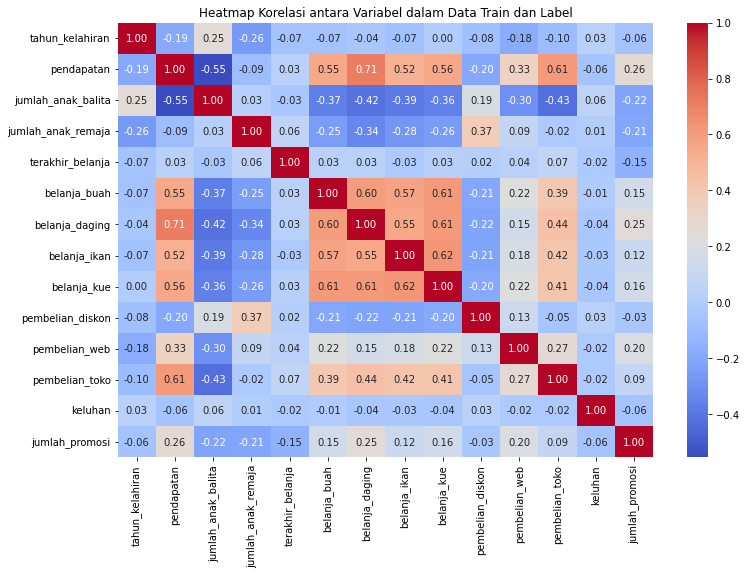

In [56]:
# Menggabungkan data train dan label
data = train.join(label)

# Menghitung korelasi antara variabel numerik
corr = data.corr()

# Membuat heatmap dari korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antara Variabel dalam Data Train dan Label')
plt.show()

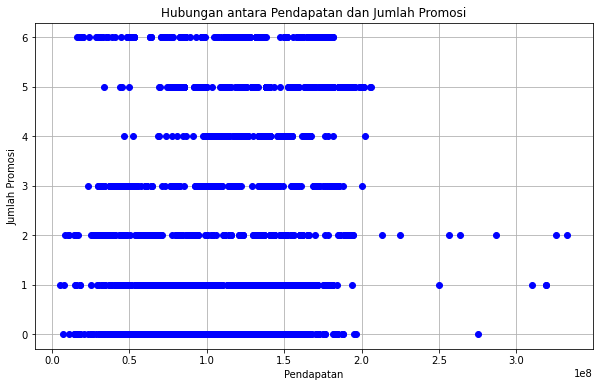

In [57]:
# pendapatan

# Membuat grafik dari hubungan antara pendapatan dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.plot(data['pendapatan'], data['jumlah_promosi'], marker='o', linestyle='None', color='b')
plt.title('Hubungan antara Pendapatan dan Jumlah Promosi')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Promosi')
plt.grid(True)
plt.show()

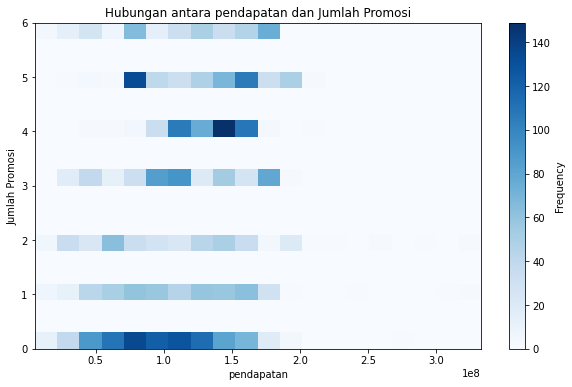

In [58]:
# pendapatan# Menggabungkan data train dan label

# Menghapus baris dengan nilai NaN pada kolom 'pendapatan' atau 'jumlah_promosi'
data_pendapatan = data.dropna(subset=['pendapatan', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara belanja buah dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_pendapatan['pendapatan'], data_pendapatan['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara pendapatan dan Jumlah Promosi')
plt.xlabel('pendapatan')
plt.ylabel('Jumlah Promosi')
plt.show()

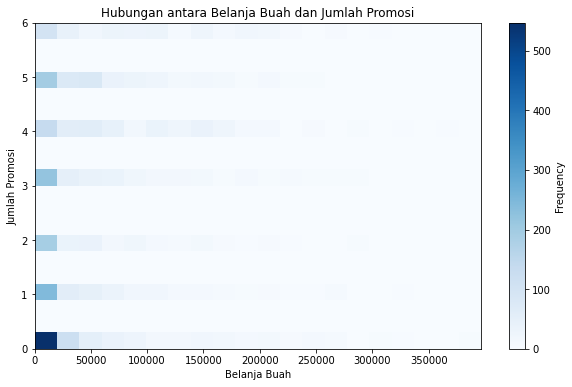

In [59]:
# belanja buah

# Menghapus baris dengan nilai NaN pada kolom 'belanja_buah' atau 'jumlah_promosi'
data_belanja_buah = data.dropna(subset=['belanja_buah', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara belanja buah dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_belanja_buah['belanja_buah'], data_belanja_buah['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Belanja Buah dan Jumlah Promosi')
plt.xlabel('Belanja Buah')
plt.ylabel('Jumlah Promosi')
plt.show()

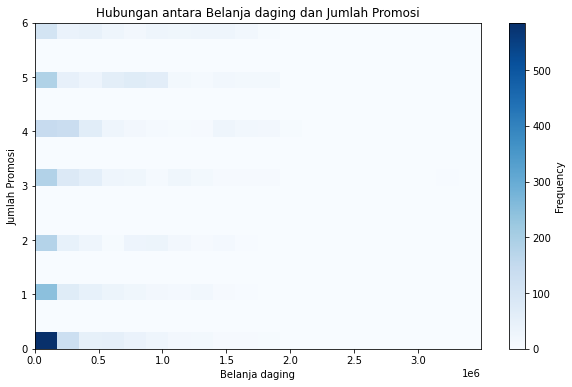

In [60]:
# belanja daging


# Menghapus baris dengan nilai NaN pada kolom 'belanja_daging' atau 'jumlah_promosi'
data_belanja_daging = data.dropna(subset=['belanja_daging', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara Belanja daging dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_belanja_daging['belanja_daging'], data_belanja_daging['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Belanja daging dan Jumlah Promosi')
plt.xlabel('Belanja daging')
plt.ylabel('Jumlah Promosi')
plt.show()

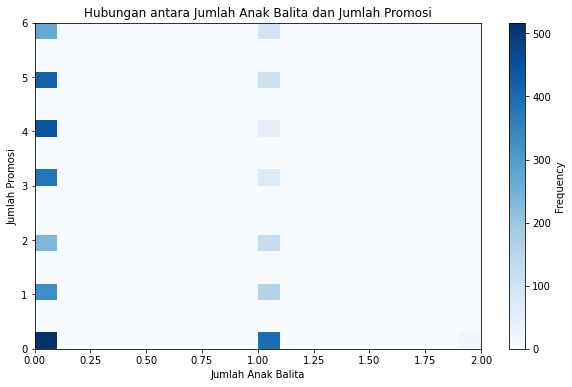

In [61]:
# Jumlah Anak Balita


# Menghapus baris dengan nilai NaN pada kolom 'jumlah_anak_balita' atau 'jumlah_promosi'
data_jumlah_anak_balita = data.dropna(subset=['jumlah_anak_balita', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara Jumlah Anak Balita dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_jumlah_anak_balita['jumlah_anak_balita'], data_jumlah_anak_balita['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Jumlah Anak Balita dan Jumlah Promosi')
plt.xlabel('Jumlah Anak Balita')
plt.ylabel('Jumlah Promosi')
plt.show()

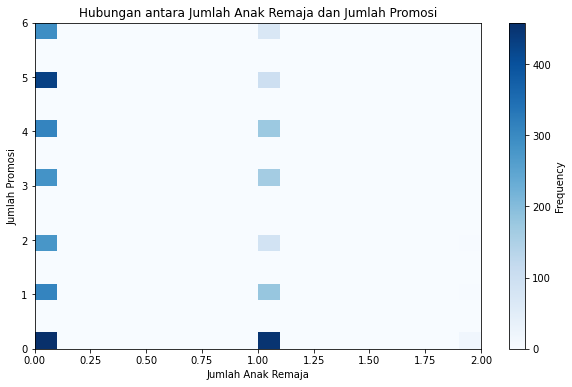

In [62]:
# Jumlah Anak Remaja


# Menghapus baris dengan nilai NaN pada kolom 'jumlah_anak_remaja' atau 'jumlah_promosi'
data_jumlah_anak_remaja = data.dropna(subset=['jumlah_anak_remaja', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara Jumlah Anak Remaja dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_jumlah_anak_remaja['jumlah_anak_remaja'], data_jumlah_anak_remaja['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Jumlah Anak Remaja dan Jumlah Promosi')
plt.xlabel('Jumlah Anak Remaja')
plt.ylabel('Jumlah Promosi')
plt.show()

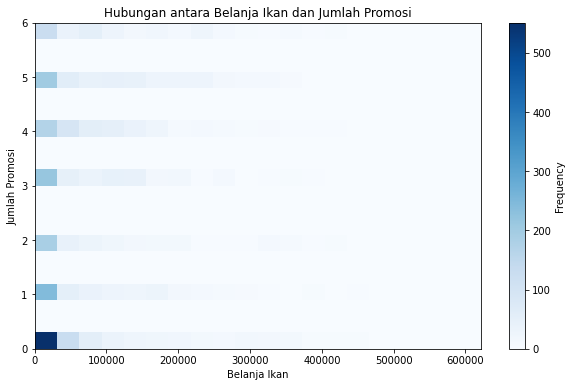

In [63]:
# Belanja Ikan
# Menggabungkan data train dan label
data = train.join(label)

# Menghapus baris dengan nilai NaN pada kolom 'belanja_ikan' atau 'jumlah_promosi'
data_belanja_ikan = data.dropna(subset=['belanja_ikan', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara Belanja Ikan dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_belanja_ikan['belanja_ikan'], data_belanja_ikan['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Belanja Ikan dan Jumlah Promosi')
plt.xlabel('Belanja Ikan')
plt.ylabel('Jumlah Promosi')
plt.show()

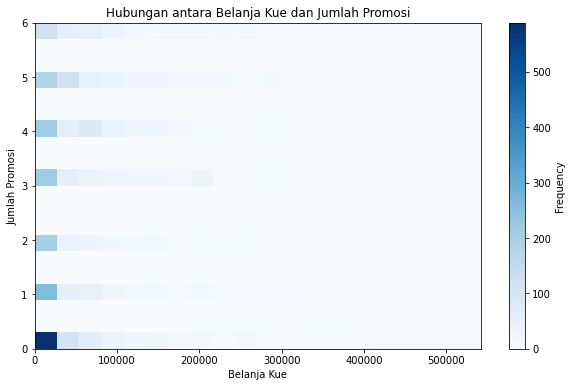

In [64]:
# Belanja Kue

# Menghapus baris dengan nilai NaN pada kolom 'belanja_kue' atau 'jumlah_promosi'
data_belanja_kue = data.dropna(subset=['belanja_kue', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara Belanja Kue dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_belanja_kue['belanja_kue'], data_belanja_kue['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Belanja Kue dan Jumlah Promosi')
plt.xlabel('Belanja Kue')
plt.ylabel('Jumlah Promosi')
plt.show()

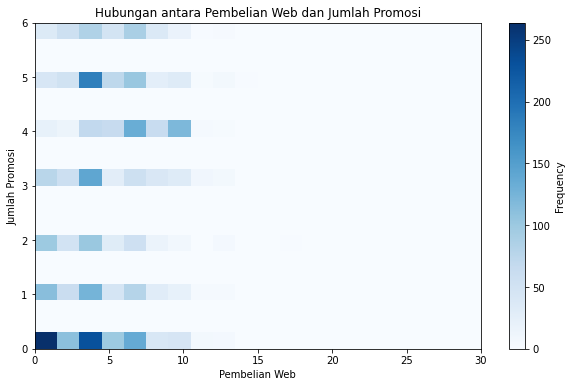

In [65]:
# Pembelian Web

# Menghapus baris dengan nilai NaN pada kolom 'pembelian_web' atau 'jumlah_promosi'
data_pembelian_web = data.dropna(subset=['pembelian_web', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara Pembelian Web dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_pembelian_web['pembelian_web'], data_pembelian_web['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Pembelian Web dan Jumlah Promosi')
plt.xlabel('Pembelian Web')
plt.ylabel('Jumlah Promosi')
plt.show()

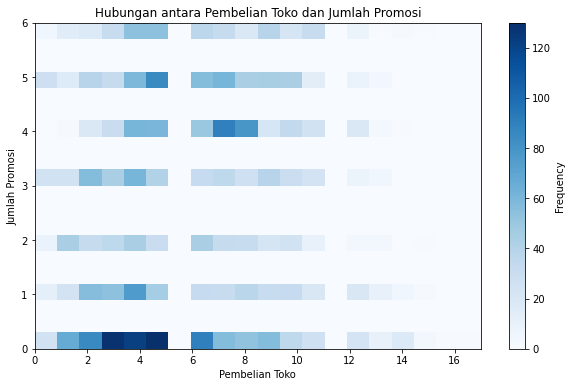

In [67]:
# Pembelian Toko

# Menghapus baris dengan nilai NaN pada kolom 'pembelian_toko' atau 'jumlah_promosi'
data_pembelian_toko = data.dropna(subset=['pembelian_toko', 'jumlah_promosi'])

# Membuat histogram dari hubungan antara Pembelian Toko dan jumlah promosi
plt.figure(figsize=(10, 6))
plt.hist2d(data_pembelian_toko['pembelian_toko'], data_pembelian_toko['jumlah_promosi'], bins=20, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hubungan antara Pembelian Toko dan Jumlah Promosi')
plt.xlabel('Pembelian Toko')
plt.ylabel('Jumlah Promosi')
plt.show()

C:\Users\amjad\AppData\Local\Temp/ipykernel_32128/2609471563.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.plot(subset_data['pendidikan'], subset_data['jumlah_promosi'], marker='o', linestyle='None', label=education_type)


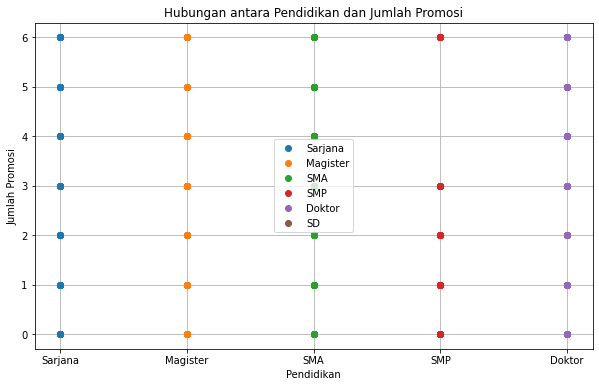

In [66]:
# Membuat grafik dari hubungan antara pendidikan dan jumlah promosi
plt.figure(figsize=(10, 6))

# Memisahkan data berdasarkan nilai pendidikan
for education_type in ['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', 'SD']:
    subset_data = data[data['pendidikan'] == education_type]
    plt.plot(subset_data['pendidikan'], subset_data['jumlah_promosi'], marker='o', linestyle='None', label=education_type)

# Menambahkan label dan judul
plt.title('Hubungan antara Pendidikan dan Jumlah Promosi')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Promosi')

# Menambahkan legenda
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan grafik
plt.show()

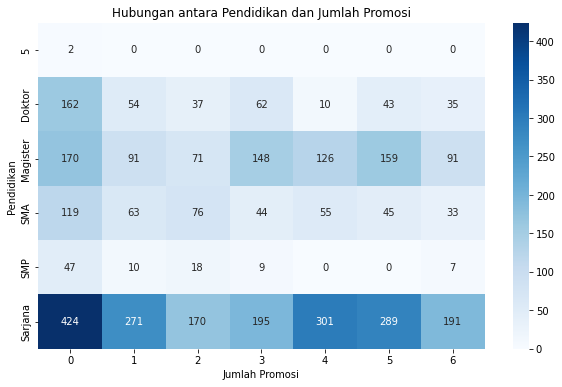

In [68]:
# Membuat pivot table untuk mengelompokkan data berdasarkan 'pendidikan' dan 'jumlah promosi'
pivot_table = data.pivot_table(index='pendidikan', columns='jumlah_promosi', aggfunc='size', fill_value=0)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')
plt.title('Hubungan antara Pendidikan dan Jumlah Promosi')
plt.xlabel('Jumlah Promosi')
plt.ylabel('Pendidikan')
plt.show()